### Glaze Alarm

Alol csv minus Leads Film does not have humidity readings except for about 5 readings in 2022 at the very end. The readings themselves are obscure times of the day.

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [33]:
data = "./Smart House 2023 datapack CC BY-NC/GlazeAlarm 2023/Leads Film.csv"
df = pd.read_csv(data, engine="python")


In [46]:
df.shape
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Timestamp      418 non-null    datetime64[ns]
 1   Serial Number  418 non-null    int64         
 2   Name           418 non-null    object        
 3   Mode           418 non-null    object        
 4   Alarm          418 non-null    object        
 5   rH             418 non-null    object        
 6   Temp           418 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 23.0+ KB


,Timestamp,Serial Number,Name,Mode,Alarm,rH,Temp
0,2023-05-15 09:49:00,1092,Leads Film,STATE,RESET,0,17.6
1,2023-05-14 17:47:00,1092,Leads Film,STATE,RESET,0.1,17.3
2,2023-05-14 07:05:00,1092,Leads Film,STATE,RESET,0,16.2
3,2023-05-14 01:44:00,1092,Leads Film,STATE,RESET,0,16.6
4,2023-05-13 20:24:00,1092,Leads Film,STATE,RESET,0,16.6


In [39]:
df.isnull().sum()

Timestamp        0
Serial Number    0
Name             0
Mode             0
Alarm            0
rH               0
Temp             0
dtype: int64

In [48]:
# Check for empty strings or non-numeric values
print(df[df['rH'] == ''].head())  # Rows with empty strings in 'rH'
print(df[df['Temp'] == ''].head())  # Rows with empty strings in 'Temp'

              Timestamp  Serial Number        Name      Mode  Alarm rH Temp
360 2022-11-29 10:06:00           1092  Leads Film  LEARNING  RESET        
361 2022-11-29 10:05:00           1092  Leads Film  LEARNING  RESET        
365 2022-11-29 10:03:00           1092  Leads Film  LEARNING  RESET        
406 2022-08-18 15:21:00           1092  Leads Film  LEARNING  RESET        
409 2022-05-04 08:56:00           1092  Leads Film  LEARNING  RESET        
              Timestamp  Serial Number        Name      Mode  Alarm rH Temp
360 2022-11-29 10:06:00           1092  Leads Film  LEARNING  RESET        
361 2022-11-29 10:05:00           1092  Leads Film  LEARNING  RESET        
365 2022-11-29 10:03:00           1092  Leads Film  LEARNING  RESET        
406 2022-08-18 15:21:00           1092  Leads Film  LEARNING  RESET        
409 2022-05-04 08:56:00           1092  Leads Film  LEARNING  RESET        


In [54]:
df['Timestamp'] = pd.to_datetime(df["Timestamp"])


# Replace empty strings with NaN
df['rH'] = df['rH'].replace('', np.nan)
df['Temp'] = df['Temp'].replace('', np.nan)

# Convert to float
df['rH'] = df['rH'].astype(float)
df['Temp'] = df['Temp'].astype(float)

# drop the missing values
df = df.dropna(subset=['rH', 'Temp'])
print(df[['rH', 'Temp']].isnull().sum())

rH      0
Temp    0
dtype: int64


Dropped the missing values in RH and Temp due to being only 6 values

In [55]:
df.head()

,Timestamp,Serial Number,Name,Mode,Alarm,rH,Temp
0,2023-05-15 09:49:00,1092,Leads Film,STATE,RESET,0.0,17.6
1,2023-05-14 17:47:00,1092,Leads Film,STATE,RESET,0.1,17.3
2,2023-05-14 07:05:00,1092,Leads Film,STATE,RESET,0.0,16.2
3,2023-05-14 01:44:00,1092,Leads Film,STATE,RESET,0.0,16.6
4,2023-05-13 20:24:00,1092,Leads Film,STATE,RESET,0.0,16.6


In [56]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 412 entries, 0 to 416
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Timestamp      412 non-null    datetime64[ns]
 1   Serial Number  412 non-null    int64         
 2   Name           412 non-null    object        
 3   Mode           412 non-null    object        
 4   Alarm          412 non-null    object        
 5   rH             412 non-null    float64       
 6   Temp           412 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 25.8+ KB


In [57]:
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month
df['Day'] = df['Timestamp'].dt.day
df['Hour'] = df['Timestamp'].dt.hour
df['DayOfWeek'] = df['Timestamp'].dt.dayofweek  # Monday=0, Sunday=6

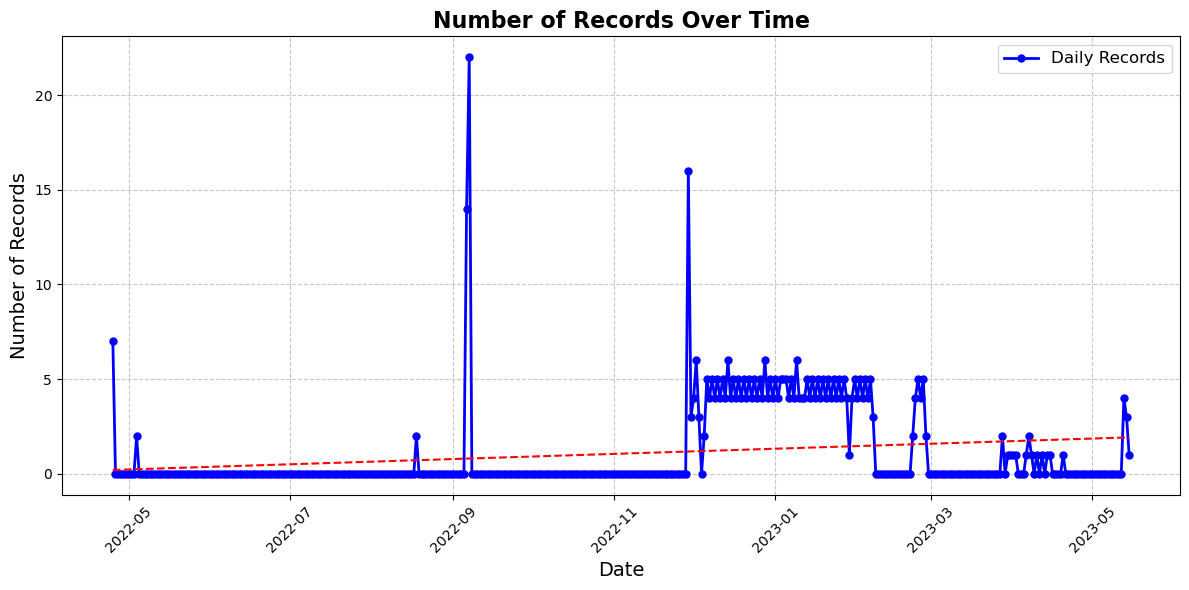

In [63]:
# Set Timestamp as the index and resample by day
daily_counts = df.set_index('Timestamp').resample('D').size()

# Plot the data
plt.figure(figsize=(12, 6))  # Set the figure size
plt.plot(daily_counts.index, daily_counts.values, color='blue', linestyle='-', linewidth=2, marker='o', markersize=5, label='Daily Records')

# Add titles and labels
plt.title('Number of Records Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Records', fontsize=14)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Add a legend
plt.legend(fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a trendline (optional)
z = np.polyfit(range(len(daily_counts)), daily_counts, 1)  # Linear trendline
p = np.poly1d(z)
plt.plot(daily_counts.index, p(range(len(daily_counts))), color='red', linestyle='--', label='Trendline')

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

In [74]:
# Filter data for November 2022 to March 2023
filtered_data = df[
    (df['Timestamp'] >= '2022-11-01') & (df['Timestamp'] <= '2023-03-31')
]
# Group by day and count records
daily_counts = filtered_data.resample('D', on='Timestamp').size().reset_index(name='Records')
# Rename the columns for clarity
daily_counts.columns = ['Date', 'Records']

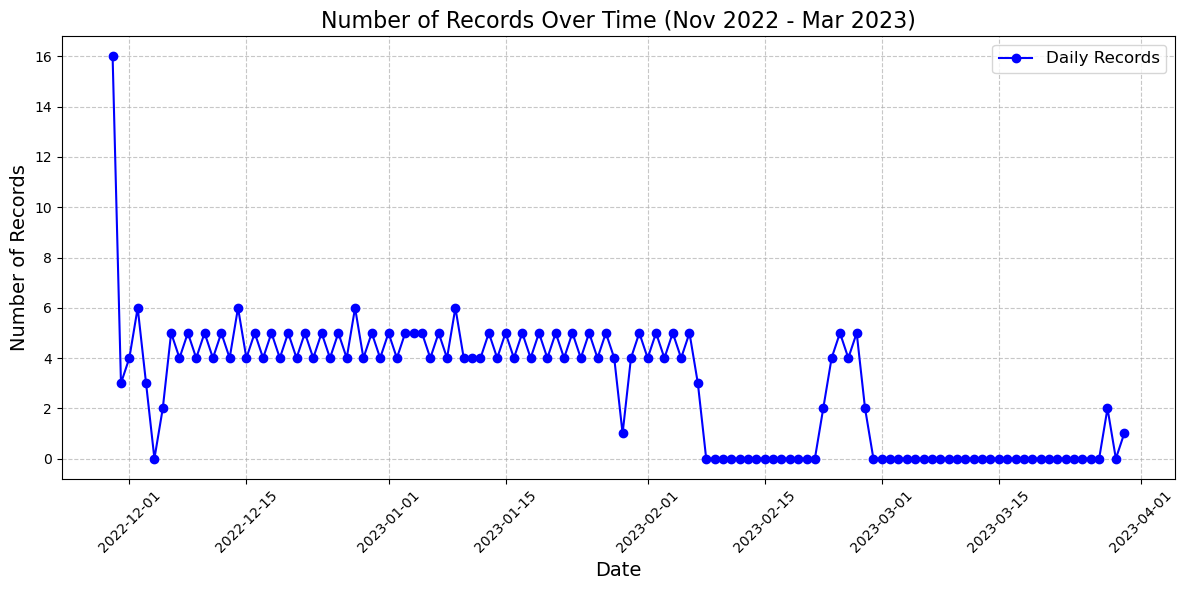

In [75]:
import matplotlib.pyplot as plt

# Create the line plot
plt.figure(figsize=(12, 6))
plt.plot(daily_counts['Date'], daily_counts['Records'], marker='o', linestyle='-', color='blue', label='Daily Records')

# Add titles and labels
plt.title('Number of Records Over Time (Nov 2022 - Mar 2023)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Records', fontsize=14)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend
plt.legend(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

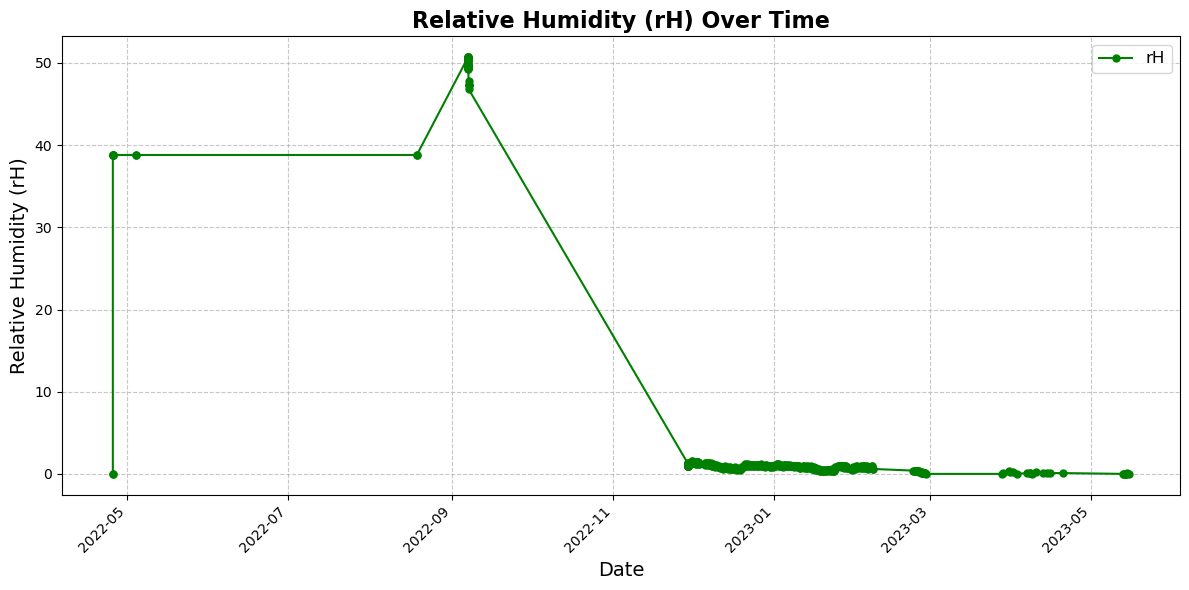

In [76]:
# Set Timestamp as the index and plot rH
df.set_index('Timestamp')['rH'].plot(figsize=(12, 6), color='green', linestyle='-', marker='o', markersize=5, label='rH')

# Add titles and labels
plt.title('Relative Humidity (rH) Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Relative Humidity (rH)', fontsize=14)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend
plt.legend(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

In [77]:
# Group by day and calculate average rH
daily_rH = filtered_data.resample('D', on='Timestamp')['rH'].mean().reset_index()

# Rename the columns for clarity
daily_rH.columns = ['Date', 'Avg rH']

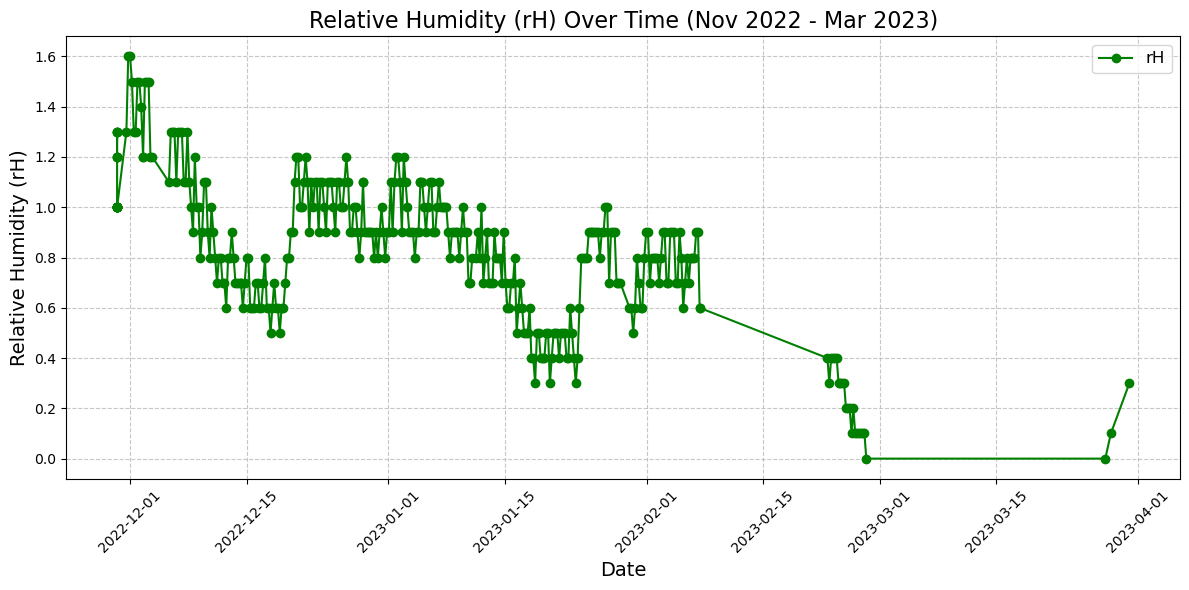

In [78]:
import matplotlib.pyplot as plt

# Create the line plot
plt.figure(figsize=(12, 6))
plt.plot(filtered_data['Timestamp'], filtered_data['rH'], marker='o', linestyle='-', color='green', label='rH')

# Add titles and labels
plt.title('Relative Humidity (rH) Over Time (Nov 2022 - Mar 2023)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Relative Humidity (rH)', fontsize=14)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend
plt.legend(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

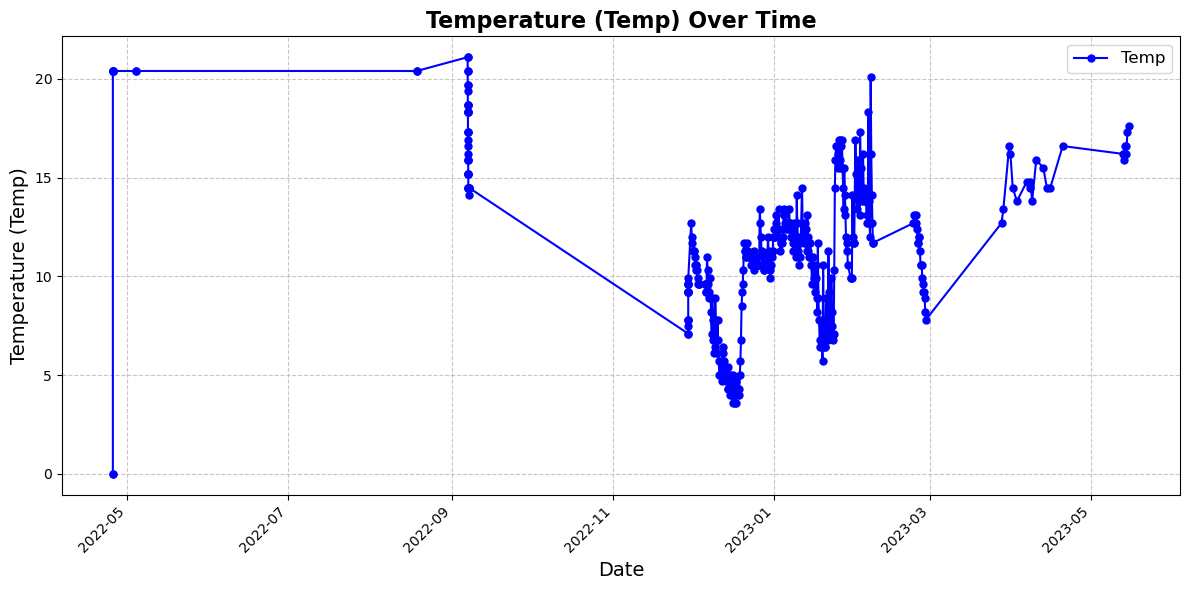

In [80]:
import matplotlib.pyplot as plt

# Set Timestamp as the index and plot Temp
df.set_index('Timestamp')['Temp'].plot(figsize=(12, 6), color='blue', linestyle='-', marker='o', markersize=5, label='Temp')

# Add titles and labels
plt.title('Temperature (Temp) Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Temperature (Temp)', fontsize=14)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend
plt.legend(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

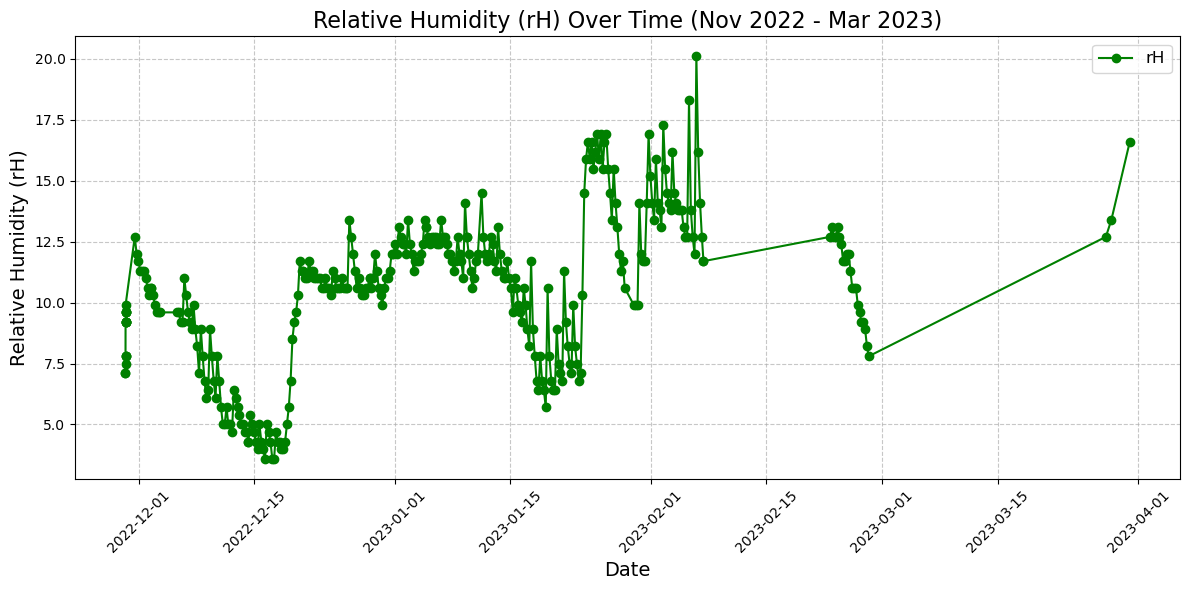

In [81]:
import matplotlib.pyplot as plt

# Create the line plot
plt.figure(figsize=(12, 6))
plt.plot(filtered_data['Timestamp'], filtered_data['Temp'], marker='o', linestyle='-', color='green', label='rH')

# Add titles and labels
plt.title('Relative Humidity (rH) Over Time (Nov 2022 - Mar 2023)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Relative Humidity (rH)', fontsize=14)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend
plt.legend(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

In [82]:
# Count the frequency of each Alarm state
alarm_counts = df['Alarm'].value_counts()

# Print the counts
print(alarm_counts)

Alarm
RESET       354
ALARM        41
PRE-WARN     17
Name: count, dtype: int64


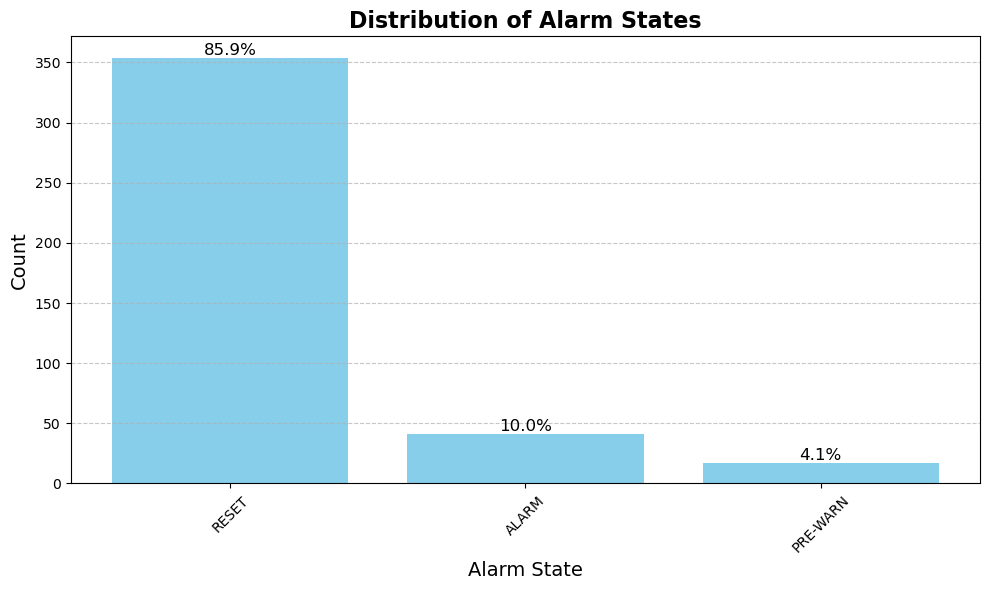

In [84]:
# Calculate percentages
total = alarm_counts.sum()
percentages = (alarm_counts / total) * 100

# Create the bar plot with percentages
plt.figure(figsize=(10, 6))
bars = plt.bar(alarm_counts.index, alarm_counts.values, color='skyblue')

# Add percentages on top of each bar
for bar, percentage in zip(bars, percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.1f}%', ha='center', va='bottom', fontsize=12)

# Add titles and labels
plt.title('Distribution of Alarm States', fontsize=16, fontweight='bold')
plt.xlabel('Alarm State', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

### Invisible System

We are using EcoLab Ground as that has ppm, rH and Temperature. Smarthouse Ground floor has alot more but more sensors that don't have full meaning to this project like IAQ, VOC, Light, Floor pressure and Floor temperature

In [101]:
data = "./Smart House 2023 datapack CC BY-NC/Invisible Systems 2023/EcoLab Ground.csv"
df_inv = pd.read_csv(data, engine="python")

In [102]:
# Remove the 'Max' and 'Min' columns
df_inv = df_inv.drop(columns=['Max', 'Min'])

df_inv['DateTime'] = pd.to_datetime(df_inv['DateTime'])

In [103]:
df_inv.shape
df_inv.info()
df_inv.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179682 entries, 0 to 179681
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   Sensor    179682 non-null  object        
 1   DateTime  179682 non-null  datetime64[ns]
 2   Value     179682 non-null  float64       
 3   Unit      179682 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 5.5+ MB


,Sensor,DateTime,Value,Unit
0,EcoLab Ground (CO107),2022-12-31 23:53:24,518.0,ppm
1,EcoLab Ground (CO107),2023-01-01 00:00:55,520.0,ppm
2,EcoLab Ground (CO107),2023-01-01 00:08:23,505.0,ppm
3,EcoLab Ground (CO107),2023-01-01 00:15:52,491.0,ppm
4,EcoLab Ground (CO107),2023-01-01 00:23:22,509.0,ppm


In [104]:
# Filter data for each unit
df_ppm = df_inv[df_inv['Unit'] == 'ppm']  # For ppm
df_rh = df_inv[df_inv['Unit'] == '%RH']   # For %RH
df_c = df_inv[df_inv['Unit'] == '°C']     # For °C

# Check the filtered data
print(df_ppm.head())
print(df_rh.head())
print(df_c.head())

                  Sensor            DateTime  Value Unit
0  EcoLab Ground (CO107) 2022-12-31 23:53:24  518.0  ppm
1  EcoLab Ground (CO107) 2023-01-01 00:00:55  520.0  ppm
2  EcoLab Ground (CO107) 2023-01-01 00:08:23  505.0  ppm
3  EcoLab Ground (CO107) 2023-01-01 00:15:52  491.0  ppm
4  EcoLab Ground (CO107) 2023-01-01 00:23:22  509.0  ppm
                     Sensor            DateTime  Value Unit
59894  EcoLab Ground (H107) 2022-12-31 23:53:24   73.0  %RH
59895  EcoLab Ground (H107) 2023-01-01 00:00:55   73.0  %RH
59896  EcoLab Ground (H107) 2023-01-01 00:08:23   73.0  %RH
59897  EcoLab Ground (H107) 2023-01-01 00:15:52   73.0  %RH
59898  EcoLab Ground (H107) 2023-01-01 00:23:22   73.0  %RH
                      Sensor            DateTime  Value Unit
119788  EcoLab Ground (T107) 2022-12-31 23:53:24   12.3   °C
119789  EcoLab Ground (T107) 2023-01-01 00:00:55   12.4   °C
119790  EcoLab Ground (T107) 2023-01-01 00:08:23   12.4   °C
119791  EcoLab Ground (T107) 2023-01-01 00:15:52   12.

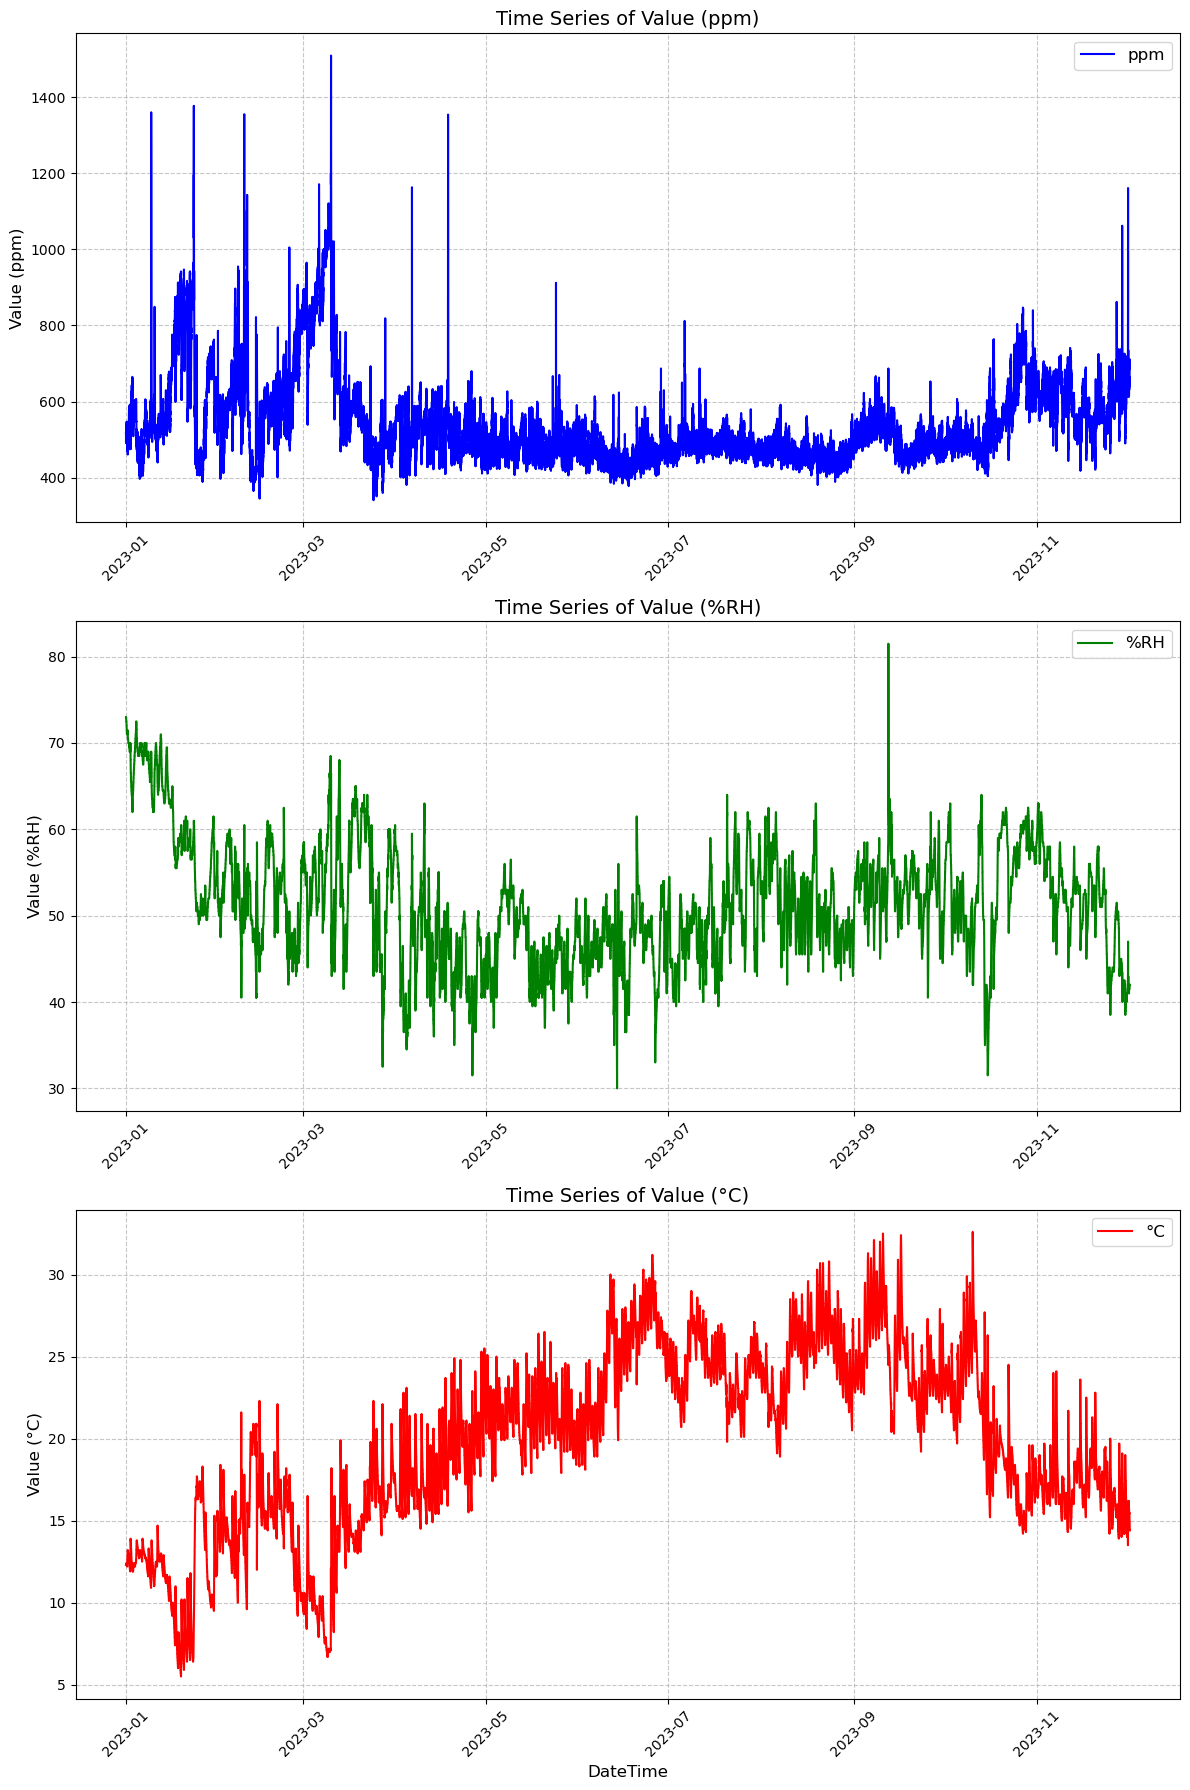

In [105]:
import matplotlib.pyplot as plt

# Create a figure with 3 subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Plot ppm
axes[0].plot(df_ppm['DateTime'], df_ppm['Value'], color='blue', label='ppm')
axes[0].set_title('Time Series of Value (ppm)', fontsize=14)
axes[0].set_ylabel('Value (ppm)', fontsize=12)
axes[0].grid(True, linestyle='--', alpha=0.7)
axes[0].legend(fontsize=12)

# Plot %RH
axes[1].plot(df_rh['DateTime'], df_rh['Value'], color='green', label='%RH')
axes[1].set_title('Time Series of Value (%RH)', fontsize=14)
axes[1].set_ylabel('Value (%RH)', fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.7)
axes[1].legend(fontsize=12)

# Plot °C
axes[2].plot(df_c['DateTime'], df_c['Value'], color='red', label='°C')
axes[2].set_title('Time Series of Value (°C)', fontsize=14)
axes[2].set_xlabel('DateTime', fontsize=12)
axes[2].set_ylabel('Value (°C)', fontsize=12)
axes[2].grid(True, linestyle='--', alpha=0.7)
axes[2].legend(fontsize=12)

# Rotate x-axis labels for better readability
for ax in axes:
    ax.tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

In [107]:
# Define the date range
start_date = '2023-01-01'
end_date = '2023-03-31'

# Filter each DataFrame by date
df_ppm_filtered = df_ppm[(df_ppm['DateTime'] >= start_date) & (df_ppm['DateTime'] <= end_date)]
df_rh_filtered = df_rh[(df_rh['DateTime'] >= start_date) & (df_rh['DateTime'] <= end_date)]
df_c_filtered = df_c[(df_c['DateTime'] >= start_date) & (df_c['DateTime'] <= end_date)]



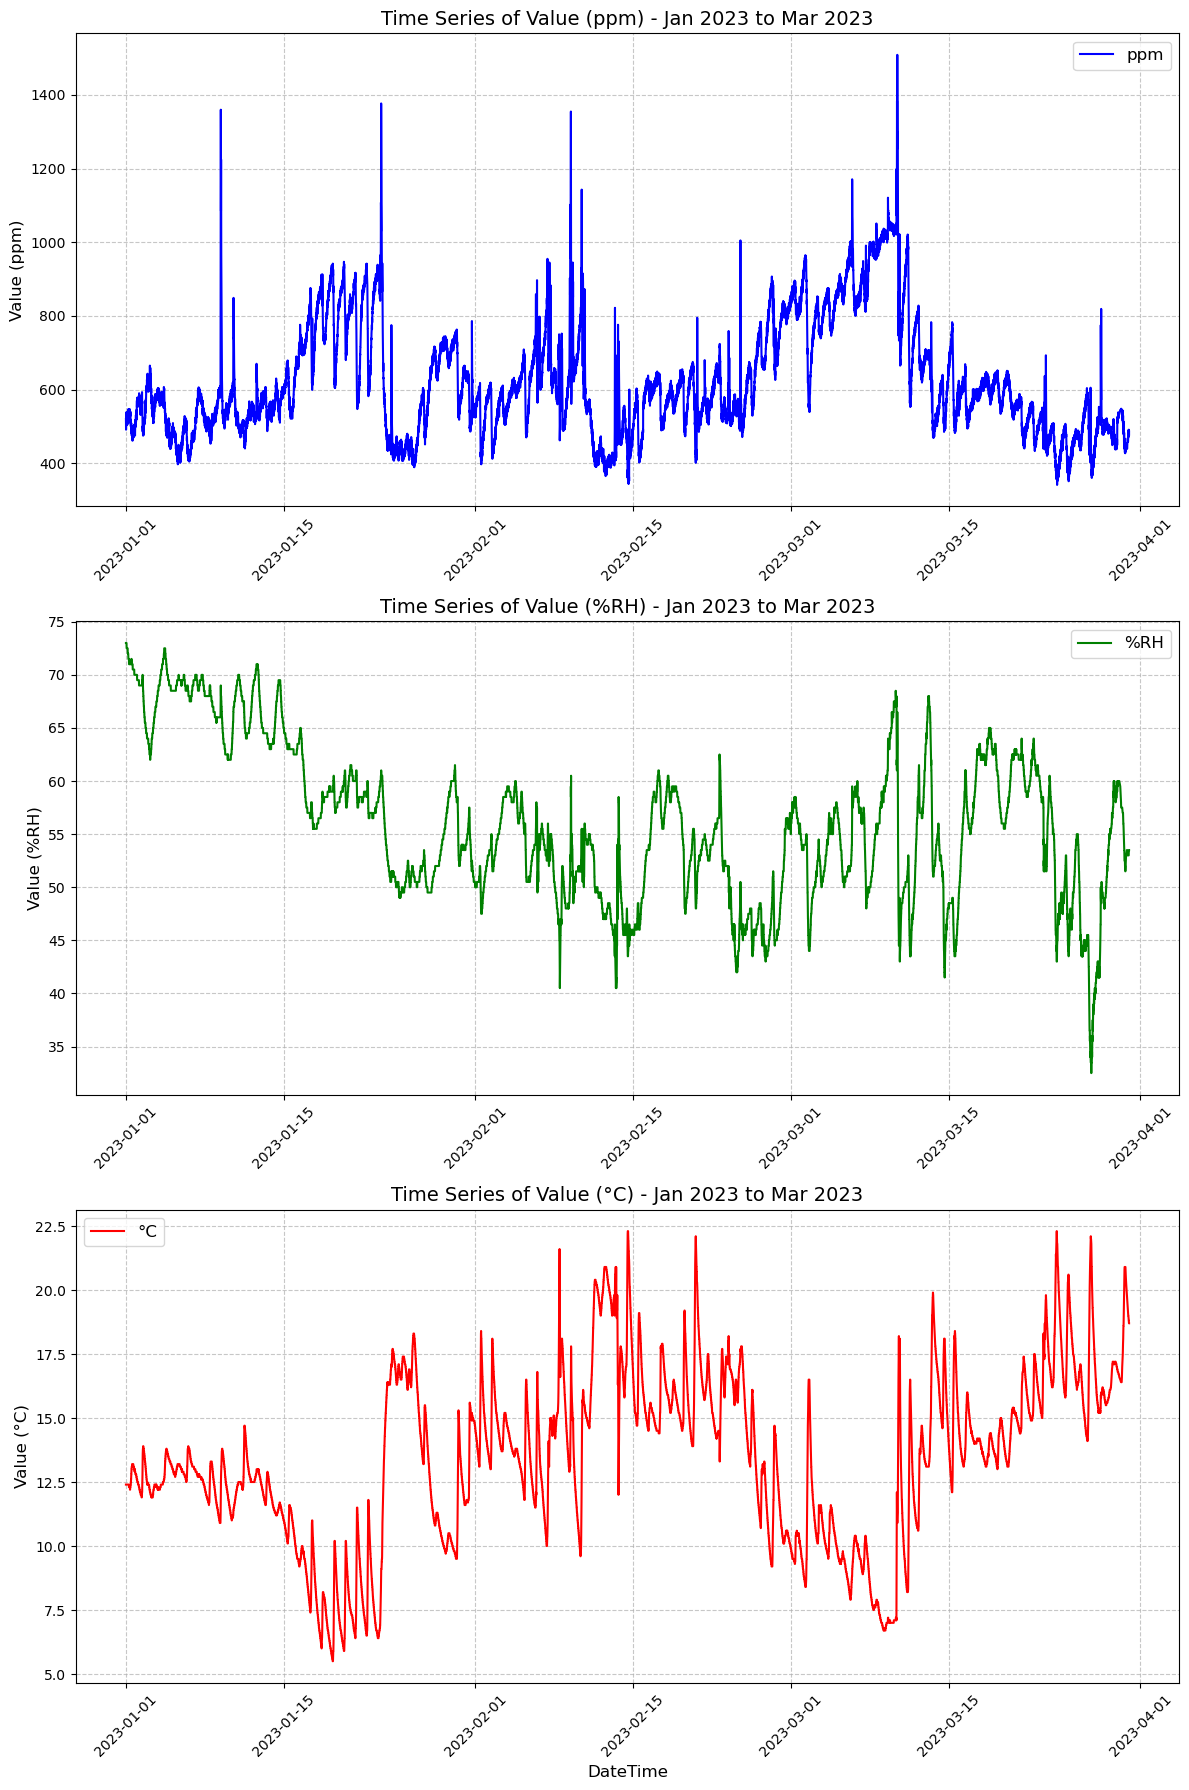

In [108]:
import matplotlib.pyplot as plt

# Create a figure with 3 subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Plot ppm
axes[0].plot(df_ppm_filtered['DateTime'], df_ppm_filtered['Value'], color='blue', label='ppm')
axes[0].set_title('Time Series of Value (ppm) - Jan 2023 to Mar 2023', fontsize=14)
axes[0].set_ylabel('Value (ppm)', fontsize=12)
axes[0].grid(True, linestyle='--', alpha=0.7)
axes[0].legend(fontsize=12)

# Plot %RH
axes[1].plot(df_rh_filtered['DateTime'], df_rh_filtered['Value'], color='green', label='%RH')
axes[1].set_title('Time Series of Value (%RH) - Jan 2023 to Mar 2023', fontsize=14)
axes[1].set_ylabel('Value (%RH)', fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.7)
axes[1].legend(fontsize=12)

# Plot °C
axes[2].plot(df_c_filtered['DateTime'], df_c_filtered['Value'], color='red', label='°C')
axes[2].set_title('Time Series of Value (°C) - Jan 2023 to Mar 2023', fontsize=14)
axes[2].set_xlabel('DateTime', fontsize=12)
axes[2].set_ylabel('Value (°C)', fontsize=12)
axes[2].grid(True, linestyle='--', alpha=0.7)
axes[2].legend(fontsize=12)

# Rotate x-axis labels for better readability
for ax in axes:
    ax.tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

### Weather Link

In [129]:
import chardet

with open(data, 'rb') as f:
    result = chardet.detect(f.read())
    print(result)

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


In [150]:
data = "./Smart House 2023 datapack CC BY-NC/WeatherLink Indoor and Outdoor 2023/Weather Link Indoor.csv"
df_wLink = pd.read_csv(data, engine="python", encoding="ISO-8859-1", skiprows=5)

In [151]:
df_wLink.head()

,Date & Time,Inside Temp - °C,High Inside Temp - °C,Low Inside Temp - °C,Inside Hum - %,High Inside Hum - %,Low Inside Hum - %,Inside Dew Point - °C,Inside Heat Index - °C,Barometer - mb,High Bar - mb,Low Bar - mb,Absolute Pressure - mb
0,1/1/2023 0:00,13,13,13,68,68,68,8,13,1002.6,1002.6,1002.6,999.6
1,1/1/2023 0:15,13,13,13,68,69,68,8,13,1002.7,1002.8,1002.6,999.7
2,1/1/2023 0:30,13,13,13,68,69,68,8,13,1002.6,1002.9,1002.6,999.6
3,1/1/2023 0:45,13,14,13,68,68,68,8,13,1002.7,1002.9,1002.6,999.8
4,1/1/2023 1:00,13,14,13,68,68,68,8,13,1002.7,1002.8,1002.7,999.7


In [152]:
df_wLink.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52864 entries, 0 to 52863
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date & Time             52864 non-null  object 
 1   Inside Temp - °C        52864 non-null  int64  
 2   High Inside Temp - °C   52864 non-null  int64  
 3   Low Inside Temp - °C    52864 non-null  int64  
 4   Inside Hum - %          52864 non-null  int64  
 5   High Inside Hum - %     52864 non-null  int64  
 6   Low Inside Hum - %      52864 non-null  int64  
 7   Inside Dew Point - °C   52864 non-null  int64  
 8   Inside Heat Index - °C  52864 non-null  int64  
 9   Barometer - mb          52864 non-null  float64
 10  High Bar - mb           52864 non-null  float64
 11  Low Bar - mb            52864 non-null  float64
 12  Absolute Pressure - mb  52864 non-null  float64
dtypes: float64(4), int64(8), object(1)
memory usage: 5.2+ MB


In [153]:
# Remove the 'Max' and 'Min' columns
df_wLink = df_wLink.drop(columns=['High Inside Temp - °C', 'Low Inside Temp - °C', "High Inside Hum - %", "Low Inside Hum - %", "High Bar - mb", "Low Bar - mb"  ])

In [154]:
df_wLink.head()

,Date & Time,Inside Temp - °C,Inside Hum - %,Inside Dew Point - °C,Inside Heat Index - °C,Barometer - mb,Absolute Pressure - mb
0,1/1/2023 0:00,13,68,8,13,1002.6,999.6
1,1/1/2023 0:15,13,68,8,13,1002.7,999.7
2,1/1/2023 0:30,13,68,8,13,1002.6,999.6
3,1/1/2023 0:45,13,68,8,13,1002.7,999.8
4,1/1/2023 1:00,13,68,8,13,1002.7,999.7


In [155]:
from datetime import datetime

# Function to standardize the date format
def standardize_date(date_str):
    try:
        # Parse the date string into a datetime object
        dt = datetime.strptime(date_str, "%d/%m/%Y %H:%M")  # For "1/1/2023 0:00"
    except ValueError:
        try:
            dt = datetime.strptime(date_str, "%d/%m/%y %H:%M")  # For "13/1/23 00:00"
        except ValueError:
            # Handle any other formats if necessary
            return None
    # Convert the datetime object back to the desired string format
    return dt.strftime("%d/%m/%y %H:%M")

# Apply the function to the 'Date & Time' column
df_wLink['Date & Time'] = df_wLink['Date & Time'].apply(standardize_date)

# Convert 'Date & Time' to datetime
df_wLink['Date & Time'] = pd.to_datetime(df_wLink['Date & Time'], format='%d/%m/%y %H:%M')

In [156]:
df_wLink.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52864 entries, 0 to 52863
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date & Time             52864 non-null  datetime64[ns]
 1   Inside Temp - °C        52864 non-null  int64         
 2   Inside Hum - %          52864 non-null  int64         
 3   Inside Dew Point - °C   52864 non-null  int64         
 4   Inside Heat Index - °C  52864 non-null  int64         
 5   Barometer - mb          52864 non-null  float64       
 6   Absolute Pressure - mb  52864 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 2.8 MB
